In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (4)\Twitter_Data.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [3]:
df = df.dropna()
df.shape

(162969, 2)

In [4]:
df['category'] = df['category'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  object
 1   category    162969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


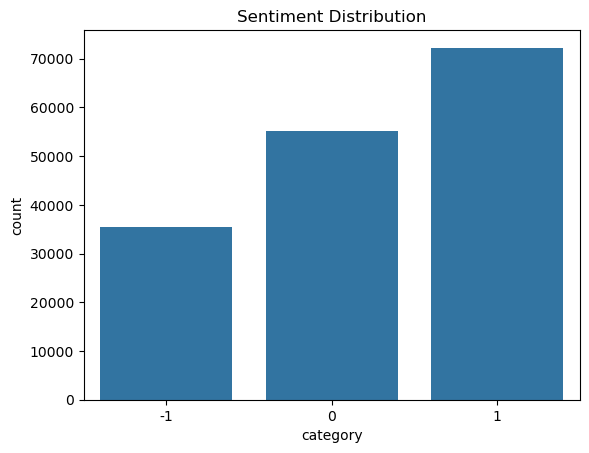

category
 1    72249
 0    55211
-1    35509
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='category', data=df)
plt.title("Sentiment Distribution")
plt.show()

df['category'].value_counts()


In [6]:
import re
import string

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#', '', text)  # remove hashtag symbol
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters
    text = text.strip()
    return text

df['clean_text'] = df['clean_text'].apply(clean_text)


In [7]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
y_pred = model.predict(X_test_vec)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8561084862244585

Classification Report:

              precision    recall  f1-score   support

          -1       0.86      0.75      0.80      7152
           0       0.82      0.95      0.88     11067
           1       0.89      0.84      0.87     14375

    accuracy                           0.86     32594
   macro avg       0.86      0.84      0.85     32594
weighted avg       0.86      0.86      0.85     32594


Confusion Matrix:

[[ 5330   828   994]
 [  145 10473   449]
 [  733  1541 12101]]


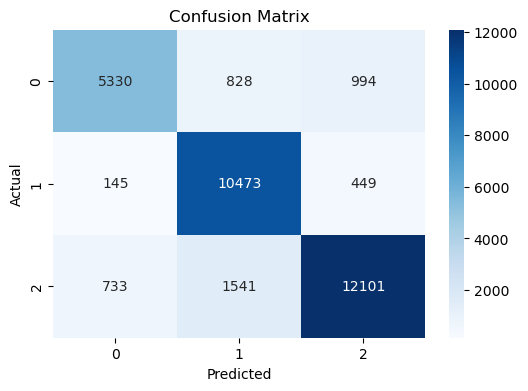

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)

y_pred_lr = lr.predict(X_test_vec)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8561084862244585


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

          -1       0.86      0.75      0.80      7152
           0       0.82      0.95      0.88     11067
           1       0.89      0.84      0.87     14375

    accuracy                           0.86     32594
   macro avg       0.86      0.84      0.85     32594
weighted avg       0.86      0.86      0.85     32594



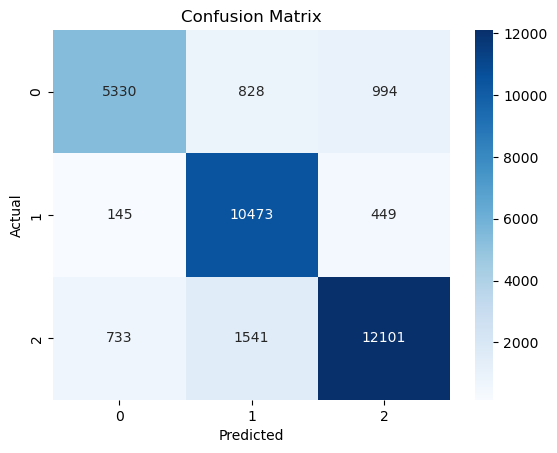

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [19]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

y_pred_nb = nb.predict(X_test_vec)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.5762717064490397
